In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

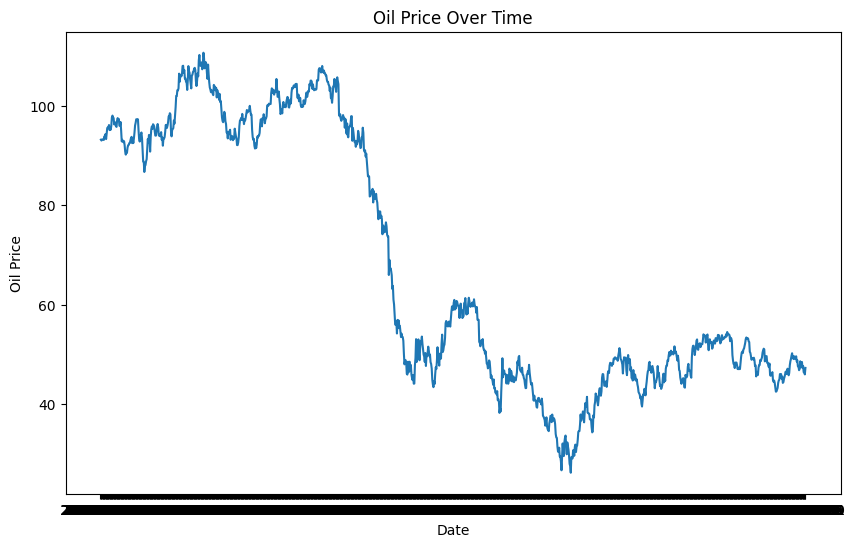

In [17]:
data_events = pd.read_csv('holidays_events.csv')
data_oil = pd.read_csv('oil.csv')
data_stores = pd.read_csv('stores.csv')
data_trans = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 补充缺失值
data_oil_withoutNA = data_oil.fillna(method="pad")

# 绘制油价数据
plt.figure(figsize=(10, 6))
plt.plot(data_oil_withoutNA['date'], data_oil_withoutNA['dcoilwtico'])
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.show()

# 将日期列转换为 datetime 格式
data_oil['date'] = pd.to_datetime(data_oil['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
data_trans['date'] = pd.to_datetime(data_trans['date'])
data_events['date'] = pd.to_datetime(data_events['date'])

# 合并油价数据
train = pd.merge(train, data_oil, on='date', how='left')
test = pd.merge(test, data_oil, on='date', how='left')

# 合并商店信息
train = pd.merge(train, data_stores, on='store_nbr', how='left')
test = pd.merge(test, data_stores, on='store_nbr', how='left')

# 合并交易信息
train['store_nbr'] = train['store_nbr'].astype(int)
data_trans['store_nbr'] = data_trans['store_nbr'].astype(int)

train = pd.merge(train, data_trans[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')
test = pd.merge(test, data_trans[['date', 'store_nbr', 'transactions']], on=['date', 'store_nbr'], how='left')

# 合并节假日信息
data_events['is_holiday'] = (data_events['type'] == 'Holiday').astype(int)

train = pd.merge(train, data_events[['date', 'is_holiday']], on='date', how='left')
test = pd.merge(test, data_events[['date', 'is_holiday']], on='date', how='left')

# 补充缺失值
train['dcoilwtico'].fillna(0, inplace=True)
train['transactions'].fillna(0, inplace=True)
train['is_holiday'].fillna(0, inplace=True)
test['dcoilwtico'].fillna(0, inplace=True)
test['transactions'].fillna(0, inplace=True)
test['is_holiday'].fillna(0, inplace=True)

# 标签编码
label = LabelEncoder()
train['type'] = label.fit_transform(train['type'])
test['type'] = label.fit_transform(test['type'])

In [45]:
# 特征选择
features = ['store_nbr', 'onpromotion', 'dcoilwtico', 'type', 'cluster', 'transactions', 'is_holiday']
X_train = train[features].value
y_train = train['sales'].value

In [6]:
# 转换数据为 LSTM 输入格式
time_steps = 10  # 设定时间步长
X_train_lstm = []
y_train_lstm = []

for i in range(time_steps, len(X_train_scaled)):
    X_train_lstm.append(X_train_scaled[i-time_steps:i])
    y_train_lstm.append(y_train_scaled[i])

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

In [8]:
# LSTM 模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # 加入 Dropout 以防止过拟合
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # 输出层

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32)


C:\Users\chen\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 922s 10ms/step - loss: 7.8887e-05
Epoch 2/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 932s 10ms/step - loss: 5.4213e-05
Epoch 3/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 874s 9ms/step - loss: 4.5201e-05
Epoch 4/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 905s 9ms/step - loss: 3.8644e-05
Epoch 5/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 835s 9ms/step - loss: 3.6277e-05
Epoch 6/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 2015s 21ms/step - loss: 3.5323e-05
Epoch 7/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 967s 10ms/step - loss: 3.3372e-05
Epoch 8/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 977s 10ms/step - loss: 3.2236e-05
Epoch 9/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 964s 10ms/step - loss: 3.2862e-05
Epoch 10/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 976s 10ms/step - loss: 3.1678e-05
Epoch 11/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 937s 10ms/step - loss: 3.1629e-05
Epoch 12/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 947s 10ms/step - loss: 3.0666e-05
Epoch 13/20
95449/95449 ━━━━━━━━━━━━━━━━━━━━ 1019s 11ms/step - 

In [19]:
test

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster,transactions,is_holiday
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80,Quito,Pichincha,3,13,0.0,0.0
1,3000889,2017-08-16,1,BABY CARE,0,46.80,Quito,Pichincha,3,13,0.0,0.0
2,3000890,2017-08-16,1,BEAUTY,2,46.80,Quito,Pichincha,3,13,0.0,0.0
3,3000891,2017-08-16,1,BEVERAGES,20,46.80,Quito,Pichincha,3,13,0.0,0.0
4,3000892,2017-08-16,1,BOOKS,0,46.80,Quito,Pichincha,3,13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,47.26,Quito,Pichincha,1,6,0.0,0.0
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26,Quito,Pichincha,1,6,0.0,0.0
28509,3029397,2017-08-31,9,PRODUCE,1,47.26,Quito,Pichincha,1,6,0.0,0.0
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,Quito,Pichincha,1,6,0.0,0.0


In [70]:
X_test_lstm = []
for i in range(0, len(X_test_scaled) - time_steps + 1):
    X_test_lstm.append(X_test_scaled[i:i+time_steps])

if len(X_test_lstm) < len(X_test_scaled):
    last_seq = X_test_lstm[-1]
    for _ in range(time_steps - 1):
        X_test_lstm.append(last_seq)

X_test_lstm = np.array(X_test_lstm)

predictions_LSTM = model.predict(X_test_lstm)


891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [71]:
# 预测
# predictions_LSTM = model.predict(X_test_lstm)
predictions_LSTM_pred = scaler_y.inverse_transform(predictions_LSTM)

In [73]:
predictions_LSTM_pred

array([[263.14462],
       [199.2317 ],
       [179.35518],
       ...,
       [108.50172],
       [108.50172],
       [108.50172]], dtype=float32)

In [75]:
submission = pd.DataFrame({'id': test['id'], 'sales': predictions_LSTM_pred.flatten()})
submission.to_csv('submission_lstm.csv', index=False)
